# Pre-Visualization

### Read Pre-Processed data

In [1]:
import pandas as pd
import numpy as np

#  Index 0 represents the award number which is unique to each document 
docs2vec = pd.read_csv('docs_vector.csv', index_col = 0, header=None)
#docs2vec.set_index(docs2vec.columns[0])
print('Data Shape: ', docs2vec.shape)
docs2vec.head()

Data Shape:  (51715, 300)


,1,2,3,4,5,6,7,8,9,10,...,291,292,293,294,295,296,297,298,299,300
0,,,,,,,,,,,,,,,,,,,,,
9000006.0,-0.069083,0.044413,-0.004985,0.051871,-0.022423,0.007859,-0.034444,-0.016032,-0.018066,0.010039,...,0.029091,0.002303,-0.036946,0.033335,-0.010555,-0.062944,-0.045402,-0.009270,-0.044425,0.054607
9000031.0,-0.064741,0.041530,-0.001909,0.053123,-0.020264,0.007367,-0.034789,-0.014702,-0.020067,0.011013,...,0.029465,0.000343,-0.036991,0.033255,-0.011299,-0.060508,-0.044876,-0.006557,-0.045649,0.052856
9000038.0,-0.069455,0.043548,-0.001687,0.052443,-0.020285,0.005822,-0.028033,-0.017673,-0.018162,0.008232,...,0.029076,0.004373,-0.038568,0.034877,-0.015254,-0.067946,-0.044138,-0.008293,-0.040171,0.059574
9000040.0,-0.070465,0.046396,-0.003707,0.050689,-0.022045,0.010205,-0.031716,-0.020966,-0.017024,0.007866,...,0.026248,0.005199,-0.042094,0.032987,-0.010240,-0.065404,-0.041707,-0.010038,-0.039915,0.057547
9000043.0,-0.066910,0.043339,-0.002843,0.050312,-0.024637,0.011407,-0.032622,-0.019322,-0.019843,0.010466,...,0.028602,0.002748,-0.034487,0.034375,-0.013085,-0.063564,-0.041438,-0.010689,-0.045691,0.052780


### Data Normalization

In [2]:
from sklearn import preprocessing
df = preprocessing.normalize(docs2vec, norm='l2', axis=1, copy=False, return_norm=False)
df = pd.DataFrame(df)
print('Data Shape: ', df.shape)
df.head()

Data Shape:  (51715, 300)


,0,1,2,3,4,5,6,7,8,9,...,290,291,292,293,294,295,296,297,298,299
0,-0.104800,0.067374,-0.007563,0.078689,-0.034016,0.011923,-0.052252,-0.024321,-0.027407,0.015229,...,0.044131,0.003494,-0.056048,0.050570,-0.016011,-0.095486,-0.068875,-0.014062,-0.067393,0.082839
1,-0.099761,0.063995,-0.002941,0.081860,-0.031225,0.011352,-0.053607,-0.022655,-0.030922,0.016970,...,0.045404,0.000528,-0.057001,0.051244,-0.017411,-0.093238,-0.069151,-0.010103,-0.070342,0.081448
2,-0.106069,0.066504,-0.002576,0.080089,-0.030978,0.008891,-0.042810,-0.026989,-0.027736,0.012572,...,0.044403,0.006679,-0.058899,0.053263,-0.023295,-0.103764,-0.067405,-0.012665,-0.061347,0.090979
3,-0.107032,0.070473,-0.005630,0.076993,-0.033485,0.015500,-0.048176,-0.031846,-0.025859,0.011948,...,0.039869,0.007897,-0.063938,0.050105,-0.015554,-0.099345,-0.063351,-0.015247,-0.060628,0.087411
4,-0.101527,0.065760,-0.004314,0.076342,-0.037384,0.017309,-0.049499,-0.029318,-0.030110,0.015880,...,0.043400,0.004169,-0.052330,0.052160,-0.019855,-0.096451,-0.062877,-0.016220,-0.069331,0.080087


### PCA Decomposition for 2D pre-visualization

In [3]:
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
principalComponents = pca.fit_transform(docs2vec)
print('Variation Ratio: ', pca.explained_variance_ratio_)
principalDf = pd.DataFrame(data = principalComponents, columns = ['principal component 1', 'principal component 2'])
print('Data shape: ', principalDf.shape)
principalDf.head()

Variation Ratio:  [0.64398984 0.06077551]
Data shape:  (51715, 2)


,principal component 1,principal component 2
0,-0.015007,-0.017575
1,-0.003376,0.004188
2,-0.017818,0.001676
3,-0.018200,-0.022651
4,-0.002533,-0.010309


### Pre-Visualization: All Points

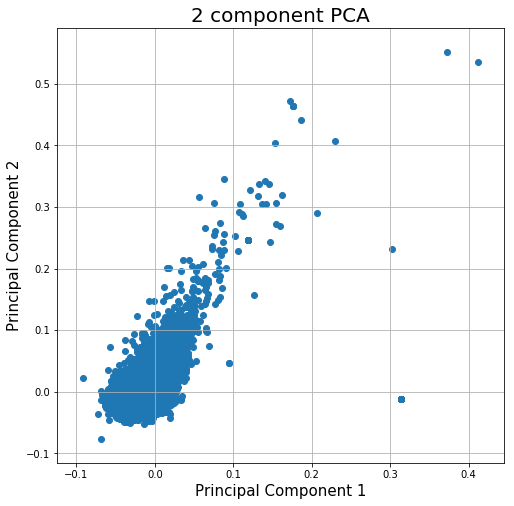

In [4]:
import matplotlib.pyplot as plt
%matplotlib inline

fig = plt.figure(figsize = (8,8))
ax = fig.add_subplot(1,1,1) 
ax.set_xlabel('Principal Component 1', fontsize = 15)
ax.set_ylabel('Principal Component 2', fontsize = 15)
ax.set_title('2 component PCA', fontsize = 20)
ax.scatter(principalDf['principal component 1'], principalDf['principal component 2'])
ax.grid()
plt.show()

### Pre-Visualization: Sample Points

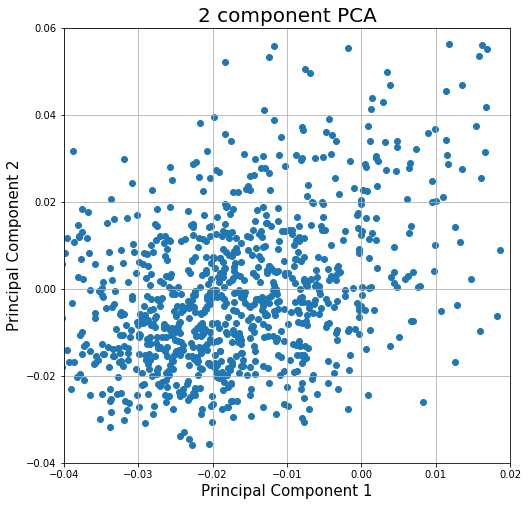

In [5]:
import matplotlib.pyplot as plt
%matplotlib inline

principalDf_sample = principalDf.sample(n = 1000)
fig = plt.figure(figsize = (8,8))
ax = fig.add_subplot(1,1,1) 
ax.set_xlabel('Principal Component 1', fontsize = 15)
ax.set_ylabel('Principal Component 2', fontsize = 15)
ax.set_title('2 component PCA', fontsize = 20)
plt.xlim([-0.04, 0.02])
plt.ylim([-0.04, 0.06])
ax.scatter(principalDf_sample['principal component 1'], principalDf_sample['principal component 2'])
ax.grid()
plt.show()